# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint


import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

597

In [3]:
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# creating empty lists to fill API data.
city_name=[]
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [5]:
# 
def get_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q":city
    }
    r = requests.get(url,params=payload)
    if r.status_code == 200:
        return r.json()
    else: 
        return None

In [6]:
all_cities_json = []
for city in cities:
    result = get_weather(city,api_key)
    if result: 
        all_cities_json.append(result)
        

In [7]:
# all json format of cities.
len(all_cities_json) 

529

In [8]:
print("Begining Data Retrieval")
print('-'*29)
num = 1
for e in range(len(all_cities_json)):
    city_name.append(all_cities_json[e]['name'])
    country.append(all_cities_json[e]['sys']['country'])
    humidity.append(all_cities_json[e]['main']['humidity'])
    date.append(all_cities_json[e]['dt'])
    lat.append(all_cities_json[e]['coord']['lat'])
    lng.append(all_cities_json[e]['coord']['lon'])
    max_temp.append(all_cities_json[e]['main']['temp_max'])
    wind_speed.append(all_cities_json[e]['wind']['speed'])
    try:
#         print(f"Procssing Record {num} of Set 1 | {cities[e]}")
        num += 1
    except:
        print("City not found. Skipping...")
    continue
    
print('-'*35)
print("Data Retrieval Complete")
print('-'*35)

Begining Data Retrieval
-----------------------------
-----------------------------------
Data Retrieval Complete
-----------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict ={
    "City": city_name,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed    
}

In [11]:
weather_df.count()

City          529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [15]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,ZA,1577131683,88,-34.42,19.24,289.26,5.28
1,Puerto Ayora,EC,1577131683,65,-0.74,-90.35,301.15,6.70
2,Hobart,AU,1577131480,71,-42.88,147.33,285.15,3.10
3,Nikolskoye,RU,1577131683,93,59.70,30.79,277.15,2.00
4,Ushuaia,AR,1577131454,87,-54.81,-68.31,284.15,11.80


In [18]:
# save the weather_df to 
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

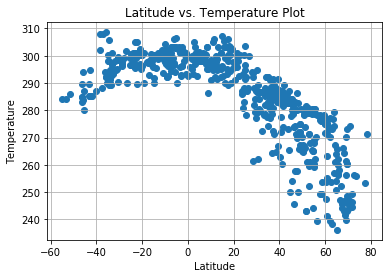

In [39]:
plt.title('Latitude vs. Temperature Plot')
plt.scatter(weather_df['Lat'],weather_df["Max Temp"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot